# Analisis Prediksi Harga Rumah Menggunakan Metode Regresi & Random Forest


---



*   Tugas Besar: Kecerdasan Buatan
*   Nama/NPM: Eva Carlia/2306007


---



*   Jurusan Teknik Informatika
*   Institut Teknologi Garut




# Mount Drive

In [2]:
from google.colab import drive # Memanggil library google colab untuk mounting dengan drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [3]:
import numpy as np # Untuk Komputasi Numerik
import pandas as pd # Untuk Manipulasi Data
import matplotlib.pyplot as plt # Untuk Menvisualisasikan Data
import seaborn as sns # Untuk Menvisualisasikan Data


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)


# Read Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/SEM 4/Kecerdasan Buatan/UAS/USA Housing Dataset.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Exploratory Data Analysis

In [5]:
#untuk menampilkan jumlah rows dan kolom serta informasi mengenai dataset
print("Ukuran Dataset:", df.shape)
print("\nInformasi Dataset:")
print(df.info())


Ukuran Dataset: (4140, 18)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  count

In [6]:
df.describe() # Menampilkan deskriptif statistik data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [7]:
print("Jumlah duplikasi:", df.duplicated().sum()) #mengecek adanya duplikasi pada dataset

Jumlah duplikasi: 0


In [8]:
df.isnull().sum() # Mengechek missing value pada dataset

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [9]:
# menghapus kolom karena tidak diperlukan
df.drop(columns=['date', 'street', 'city', 'statezip', 'country', 'waterfront'], inplace=True, errors='ignore')

# menampilkan kolom yang masih ada
print(df.columns)
df

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated'],
      dtype='object')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,3,1340,0,2008,0
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,3,3540,0,2007,0
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,3,6420,850,2010,0
3,3.240000e+05,3.0,2.25,998,904,2.0,0,3,798,200,2007,0
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,5,1600,1460,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0


In [10]:
# X adalah fitur (semua kolom kecuali target)
X = df.drop(columns=['price'])

# y adalah target (harga rumah)
y = df['price']

# Tampilkan contoh data
print("Fitur (X):")
print(X.head())

print("\nTarget (y - price):")
print(y.describe())


Fitur (X):
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  condition  \
0       3.0       2.00         1340      1384     3.0     0          3   
1       4.0       3.25         3540    159430     2.0     0          3   
2       5.0       6.50         7270    130017     2.0     0          3   
3       3.0       2.25          998       904     2.0     0          3   
4       5.0       2.75         3060      7015     1.0     0          5   

   sqft_above  sqft_basement  yr_built  yr_renovated  
0        1340              0      2008             0  
1        3540              0      2007             0  
2        6420            850      2010             0  
3         798            200      2007             0  
4        1600           1460      1979             0  

Target (y - price):
count    4.140000e+03
mean     5.530629e+05
std      5.836865e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.600000e+05
75%      6.591250e+05
max      2.659000e+07
Name: price, dtyp

# Outlier

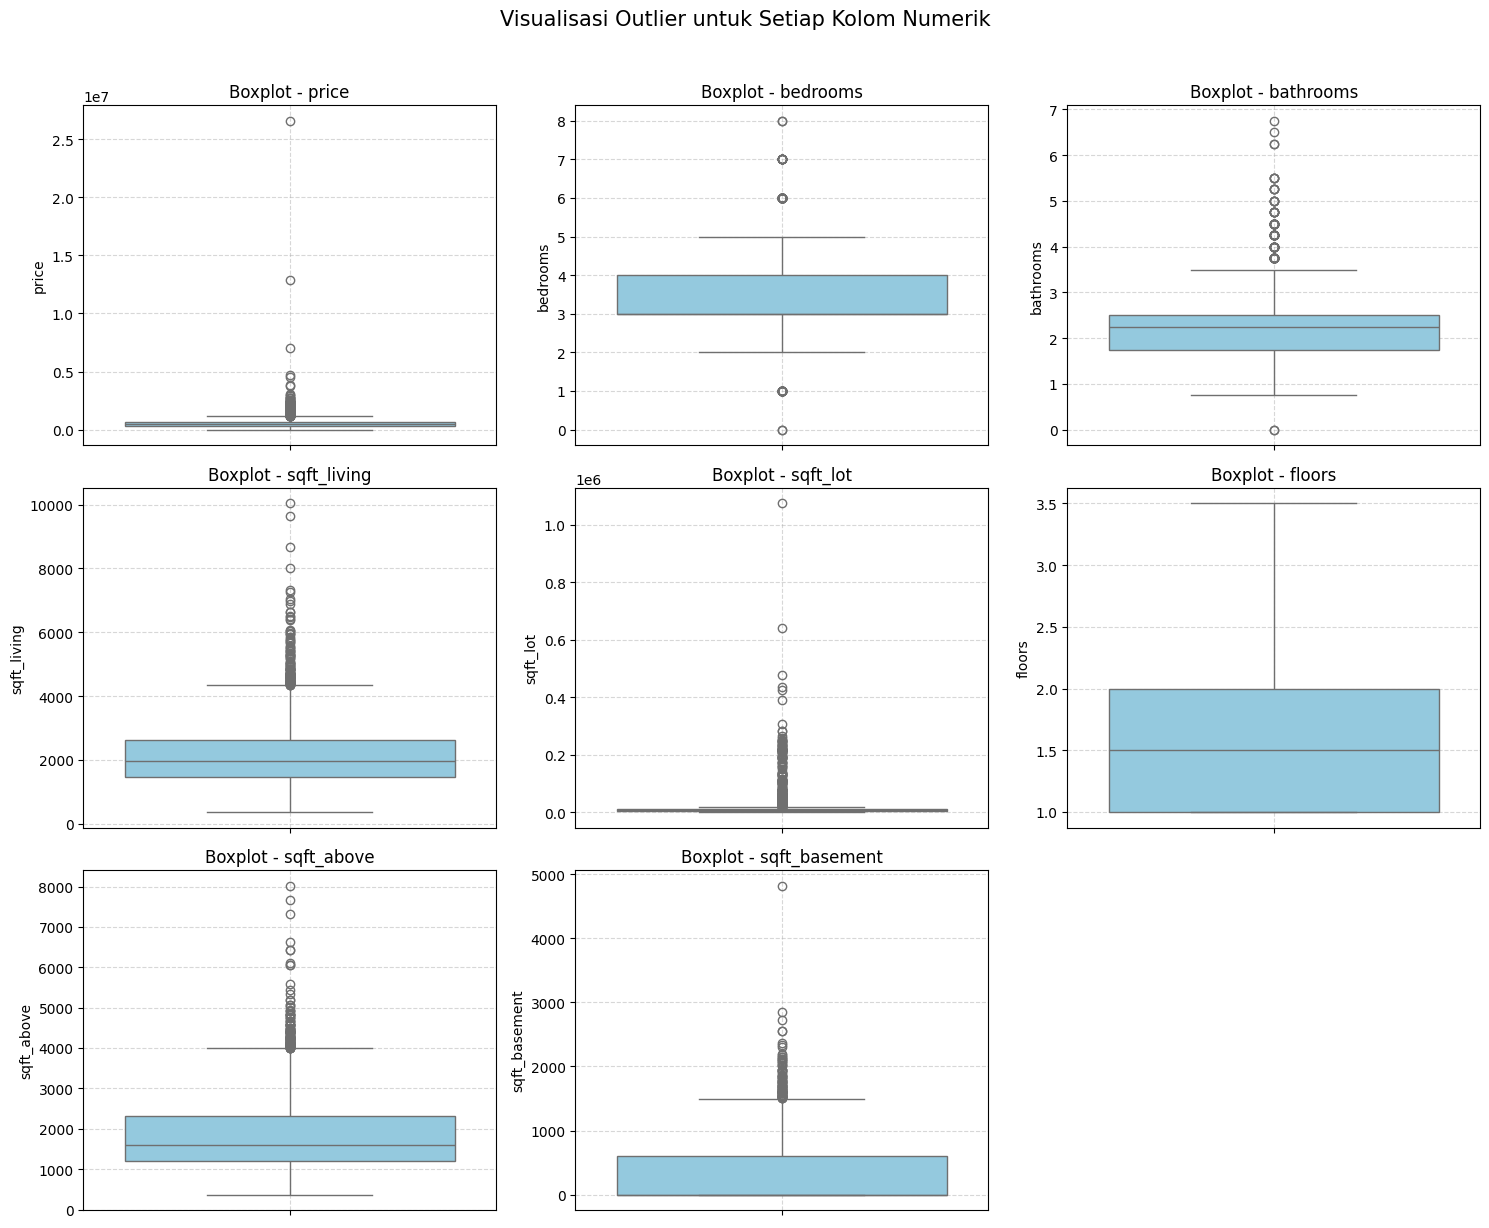

In [12]:

# Daftar kolom numerik yang ingin divisualisasikan
columns_numerik = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                   'floors', 'sqft_above', 'sqft_basement']

# Set ukuran canvas
plt.figure(figsize=(15, 12))

# Loop dan buat subplot untuk setiap kolom
for i, col in enumerate(columns_numerik):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.xlabel('')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Visualisasi Outlier untuk Setiap Kolom Numerik', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


In [13]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.36)
        Q3 = df_cleaned[col].quantile(0.66)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    return df_cleaned

# Tentukan kolom numerik untuk pembersihan outlier
columns_outliers = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'sqft_above', 'sqft_basement']

# Hapus outlier
df_cleaned = remove_outliers_iqr(df, columns_outliers)

# Cek ukuran data sebelum dan sesudah
print(f"Jumlah data sebelum: {df.shape[0]}")
print(f"Jumlah data sesudah: {df_cleaned.shape[0]}")


Jumlah data sebelum: 4140
Jumlah data sesudah: 2118


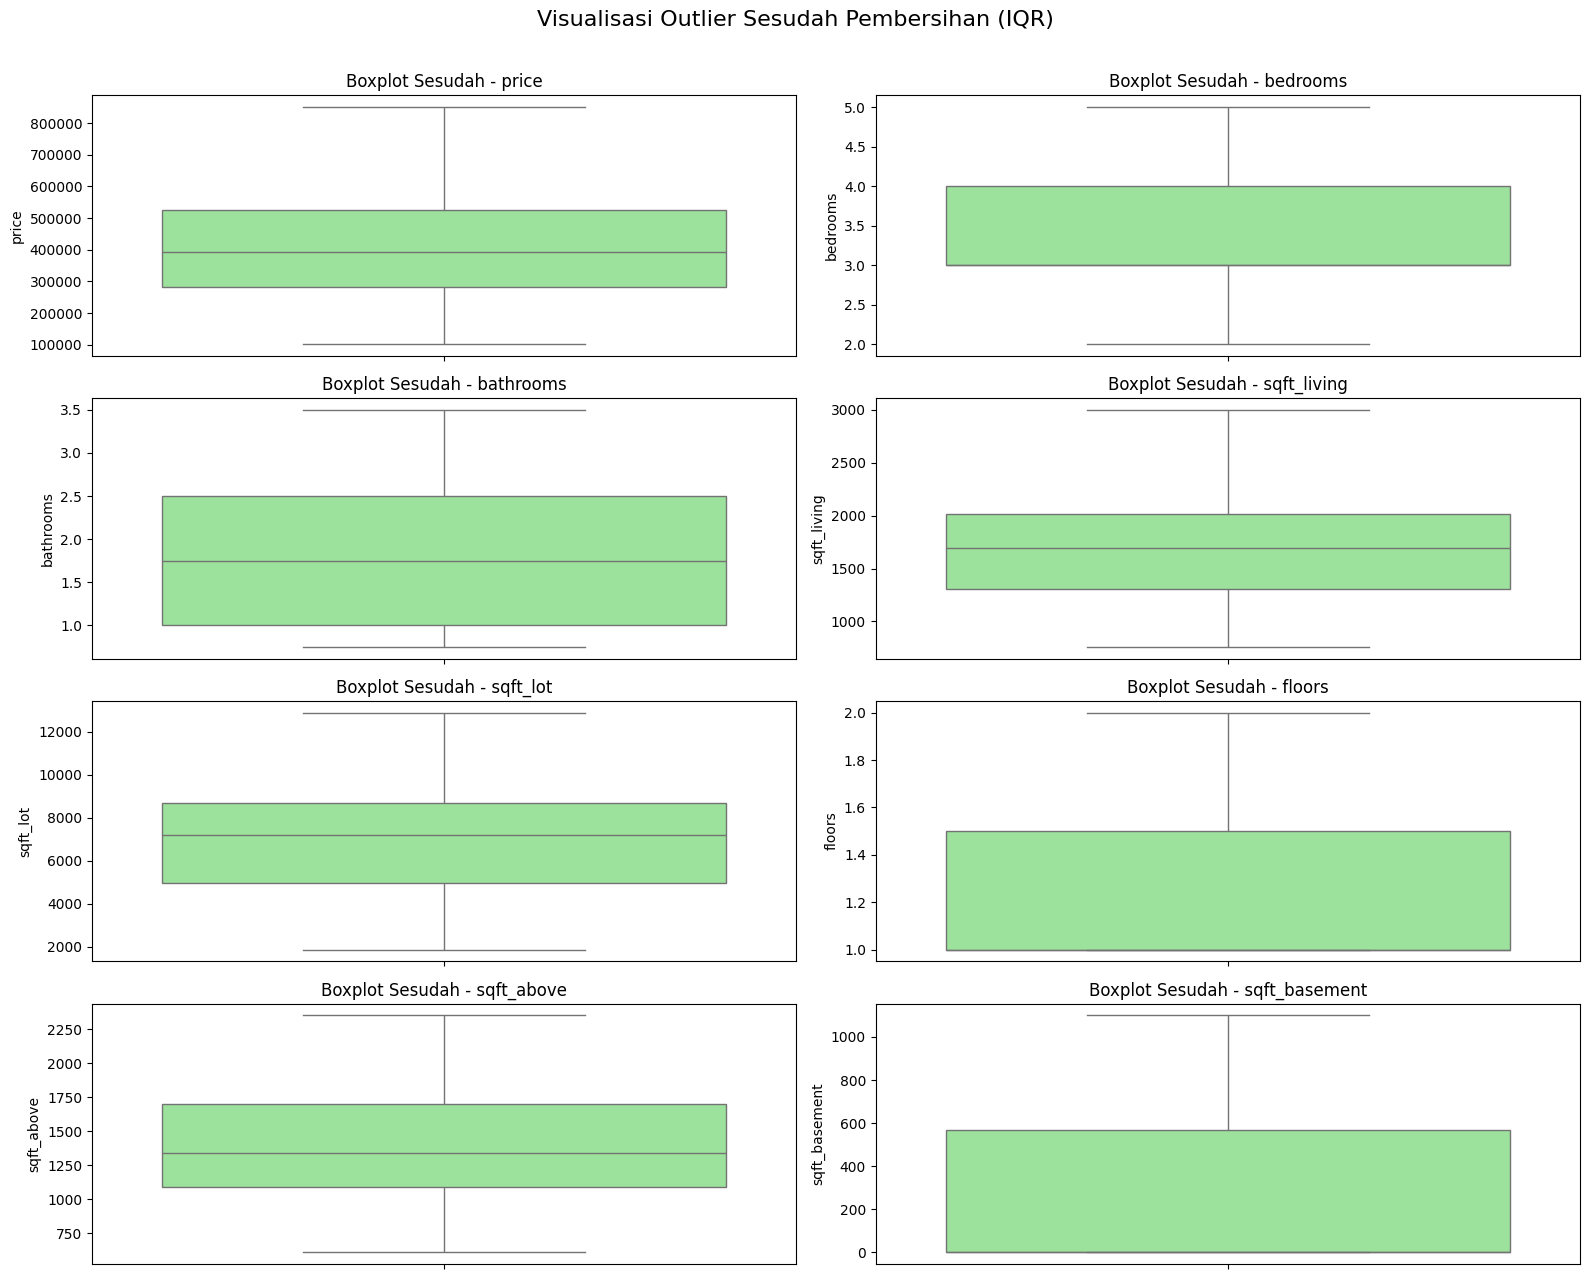

In [14]:
plt.figure(figsize=(16, 13))
for i, col in enumerate(columns_outliers):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df_cleaned, y=col, color='lightgreen')
    plt.title(f'Boxplot Sesudah - {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.suptitle('Visualisasi Outlier Sesudah Pembersihan (IQR)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Korelasi

In [15]:
# Korelasi seluruh fitur dengan price
corr_matrix = df_cleaned.corr()

# Fokus ke korelasi dengan 'price'
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)


price            1.000000
sqft_living      0.434471
bathrooms        0.280212
sqft_basement    0.277420
sqft_above       0.246728
condition        0.159010
view             0.154705
floors           0.126394
bedrooms         0.118156
yr_renovated    -0.015211
sqft_lot        -0.186393
yr_built        -0.196179
Name: price, dtype: float64


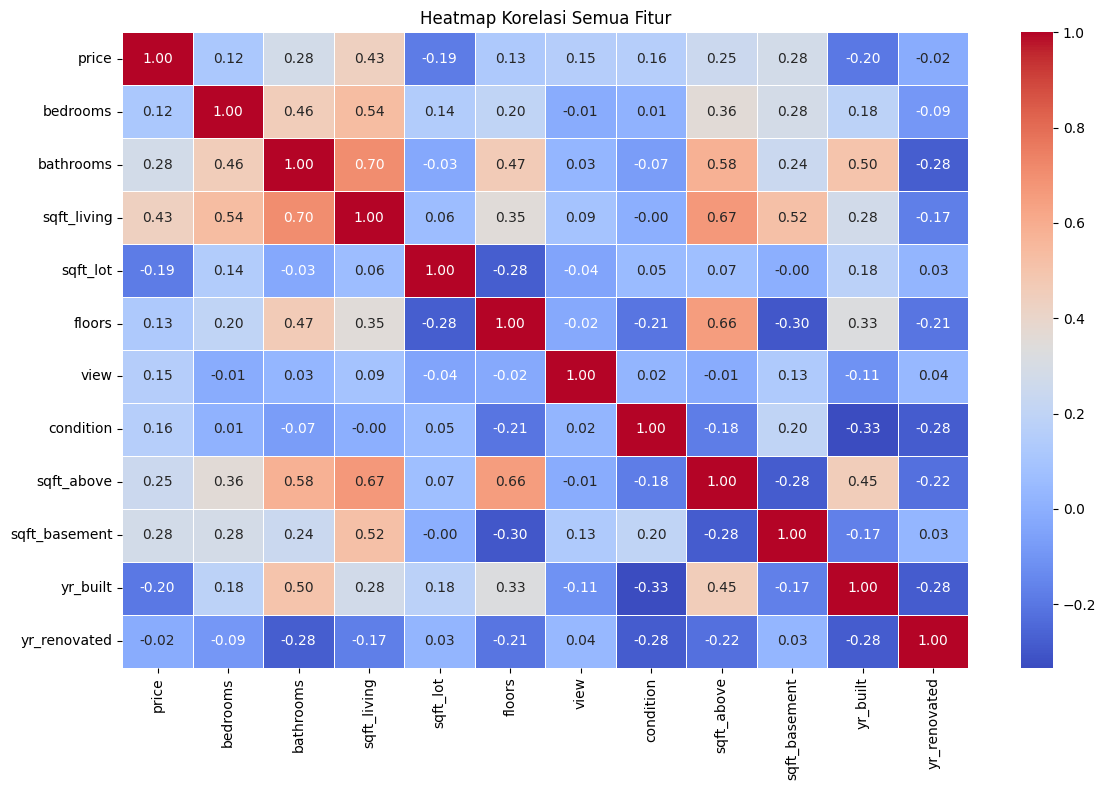

In [16]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Semua Fitur")
plt.tight_layout()
plt.show()


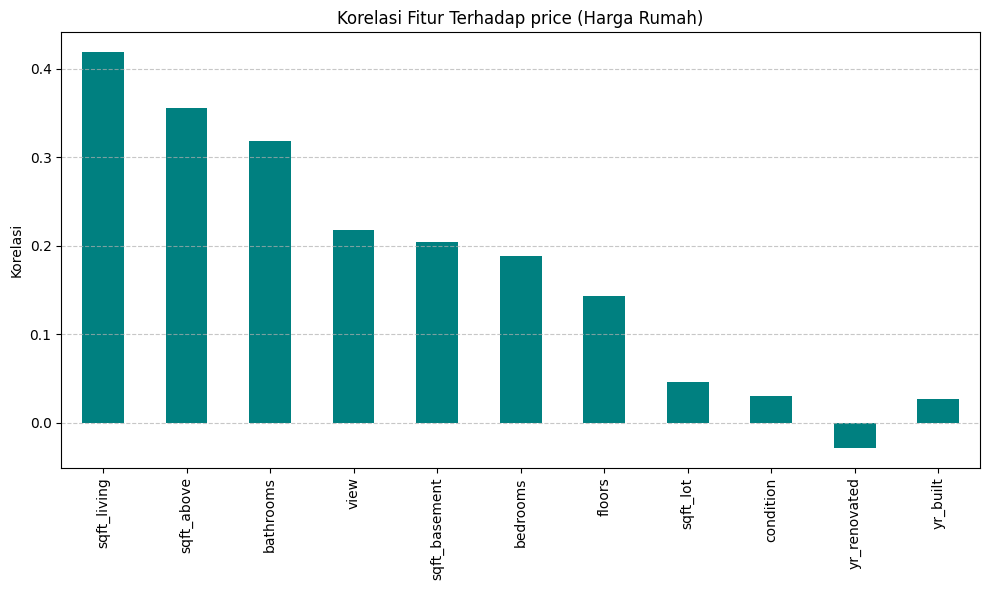

In [18]:

# Hitung korelasi hanya terhadap MEDV
cor_target = df.corr(numeric_only=True)['price'].drop('price')  # hilangkan korelasi terhadap diri sendiri

# Urutkan berdasarkan nilai absolut korelasi (paling besar pengaruh)
cor_target_sorted = cor_target.reindex(cor_target.abs().sort_values(ascending=False).index)

# Tampilkan sebagai bar chart
plt.figure(figsize=(10, 6))
cor_target_sorted.plot(kind='bar', color='teal')
plt.title('Korelasi Fitur Terhadap price (Harga Rumah)')
plt.ylabel('Korelasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
# Target
y = df_cleaned['price']

# Fitur (hapus price dari dataset)
X = df_cleaned.drop(columns=['price'])


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi
print("🔹 Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


🔹 Linear Regression:
MSE: 17643665247.26197
R2 Score: 0.3418697921318531


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi model
lr_model = LinearRegression()

# Fit model pada data training
lr_model.fit(X_train_scaled, y_train)

# Prediksi di data testing
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi di data testing
print("🔹 Linear Regression (Test Set Evaluation):")
print("MSE       :", mean_squared_error(y_test, y_pred_lr))
print("R2 Score  :", r2_score(y_test, y_pred_lr))

# Cross Validation pada data full yang sudah dinormalisasi
X_scaled_full = scaler.fit_transform(X)  # Jangan pakai X_train_scaled saja di sini, gunakan full dataset
cv_scores = cross_val_score(LinearRegression(), X_scaled_full, y, cv=5, scoring='r2')

# Hasil cross-validation
print("\n🔁 Cross-Validation (5-Fold) R² Scores:")
print("Per Fold  :", cv_scores)
print("Rata-rata :", np.mean(cv_scores))


🔹 Linear Regression (Test Set Evaluation):
MSE       : 17643665247.26197
R2 Score  : 0.3418697921318531

🔁 Cross-Validation (5-Fold) R² Scores:
Per Fold  : [0.36899012 0.36269643 0.30444137 0.38944487 0.31075516]
Rata-rata : 0.34726558915521566


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("\n🔹 Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))



🔹 Random Forest:
MSE: 17523053363.268776
R2 Score: 0.34636876233851865


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model pada data training
rf_model.fit(X_train_scaled, y_train)

# Prediksi di data testing
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi pada test set
print("\n🔹 Random Forest (Test Set Evaluation):")
print("MSE      :", mean_squared_error(y_test, y_pred_rf))
print("R2 Score :", r2_score(y_test, y_pred_rf))

# Cross-validation pada seluruh data (yang sudah dinormalisasi)
X_scaled_full = scaler.fit_transform(X)
cv_scores_rf = cross_val_score(
    RandomForestRegressor(n_estimators=100, random_state=42),
    X_scaled_full, y, cv=5, scoring='r2'
)

# Evaluasi Cross-Validation
print("\n🔁 Cross-Validation (5-Fold) R² Scores:")
print("Per Fold  :", cv_scores_rf)
print("Rata-rata :", np.mean(cv_scores_rf))



🔹 Random Forest (Test Set Evaluation):
MSE      : 17482073969.40069
R2 Score : 0.34789734365236435

🔁 Cross-Validation (5-Fold) R² Scores:
Per Fold  : [0.39127291 0.36792449 0.29762365 0.38145508 0.28969991]
Rata-rata : 0.3455952082210956


In [26]:
print("📊 Ringkasan Model:")
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Random Forest R²    :", r2_score(y_test, y_pred_rf))

print("\nLinear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


📊 Ringkasan Model:
Linear Regression R²: 0.3418697921318531
Random Forest R²    : 0.34789734365236435

Linear Regression RMSE: 132829.4592598418
Random Forest RMSE     : 132219.794166383


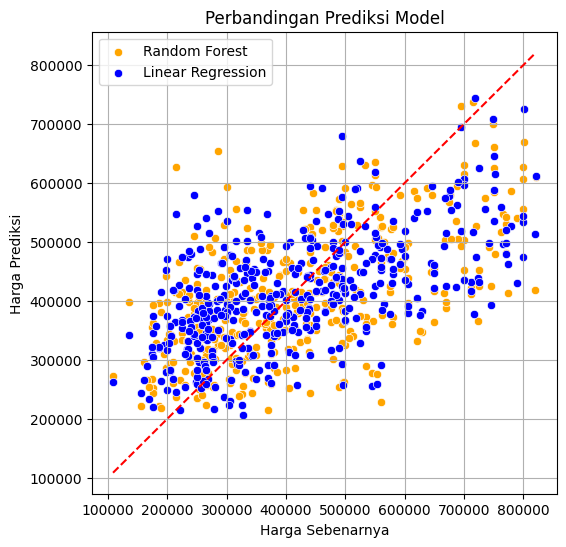

In [27]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='orange', label='Random Forest')
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Harga Sebenarnya")
plt.ylabel("Harga Prediksi")
plt.title("Perbandingan Prediksi Model")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Grid parameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Inisialisasi model
rf = RandomForestRegressor(random_state=42)

# Grid Search dengan Cross-Validation
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit ke data training (pastikan data sudah diskalakan jika perlu)
grid_rf.fit(X_train_scaled, y_train)

# Model terbaik
best_rf = grid_rf.best_estimator_

# Tampilkan hasil terbaik
print("🎯 Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Cross-Validated R² Score     :", grid_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

🎯 Best Parameters (Random Forest): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated R² Score     : 0.3874186437186985


In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Grid alpha (regularisasi)
ridge_params = {'alpha': [0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    cv=5,
    scoring='r2'
)

grid_ridge.fit(X_train_scaled, y_train)

best_ridge = grid_ridge.best_estimator_
print("🎯 Best Alpha (Ridge):", grid_ridge.best_params_)
print("Best R² (Ridge CV)   :", grid_ridge.best_score_)


🎯 Best Alpha (Ridge): {'alpha': 10}
Best R² (Ridge CV)   : 0.35450367430697716


In [30]:
from sklearn.linear_model import Lasso

lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

grid_lasso = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid=lasso_params,
    cv=5,
    scoring='r2'
)

grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
print("🎯 Best Alpha (Lasso):", grid_lasso.best_params_)
print("Best R² (Lasso CV)   :", grid_lasso.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.877e+11, tolerance: 3.437e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+11, tolerance: 3.488e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.979e+11, tolerance: 3.339e

🎯 Best Alpha (Lasso): {'alpha': 10}
Best R² (Lasso CV)   : 0.3544103091886018


In [33]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluasi best_rf
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Test R² (Best RF)  :", r2_score(y_test, y_pred_best_rf))
print("Test RMSE (Best RF):", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))


Test R² (Best RF)  : 0.3527517231539896
Test RMSE (Best RF): 131726.73987186782


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Grid alpha (regularisasi)
ridge_params = {'alpha': [0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
    estimator=Ridge(),
    param_grid=ridge_params,
    cv=5,
    scoring='r2'
)

# Training dengan data latih yang telah dinormalisasi
grid_ridge.fit(X_train_scaled, y_train)

# Ambil model terbaik
best_ridge = grid_ridge.best_estimator_
print("🎯 Best Alpha (Ridge):", grid_ridge.best_params_)
print("Best R² (CV):", grid_ridge.best_score_)

# 🔮 Prediksi
y_pred_ridge = best_ridge.predict(X_test_scaled)

# 📊 Evaluasi
print("\n📊 Evaluasi di Test Set:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE    :", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE     :", mean_absolute_error(y_test, y_pred_ridge))


🎯 Best Alpha (Ridge): {'alpha': 10}
Best R² (CV): 0.35450367430697716

📊 Evaluasi di Test Set:
R² Score: 0.3414001709173944
RMSE    : 132876.84229071756
MAE     : 107337.20762306654


In [37]:
# Evaluasi model terbaik
print("Linear Regression (Ridge):")
print("R²:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

print("Random Forest (Tuned):")
print("R²:", r2_score(y_test, y_pred_best_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))


Linear Regression (Ridge):
R²: 0.3414001709173944
RMSE: 132876.84229071756
Random Forest (Tuned):
R²: 0.3527517231539896
RMSE: 131726.73987186782


Text(0.5, 1.0, 'Prediksi vs Aktual')

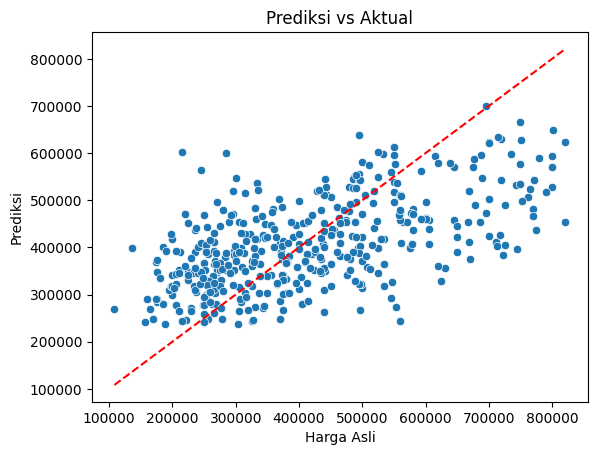

In [40]:
sns.scatterplot(x=y_test, y=y_pred_best_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Harga Asli"); plt.ylabel("Prediksi"); plt.title("Prediksi vs Aktual")
